# Projet classification de données hyperspectrales

# Données fournies

In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [2]:
houston = np.load('houston.npz')

In [3]:
hyp = houston["hyp_img"] # image hyperspectrale
label = houston["label_img"] # données d'apprentissage

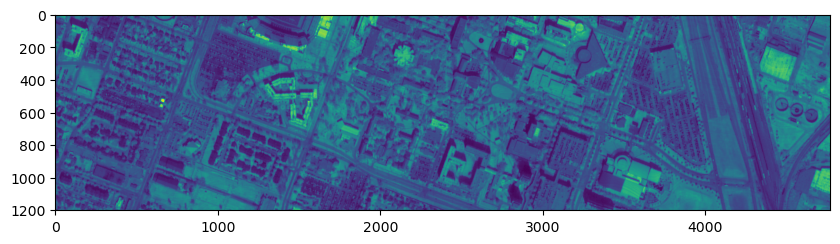

In [4]:
nbands=[35,20,5]

plt.figure(figsize=(10,15))
plt.imshow(hyp[:,:,47])
plt.show()

In [5]:
def viz_label_img(label_img):
    N = np.max(label_img) + 1  
    colours = cm.get_cmap("tab10", N)
    cmap = colours(np.linspace(0, 1, N))  # obtenir une image RGB
    cmap[0, -1] = 0  # transparent pour les pixels à étiquetter
    display_img = cmap[label_img.flatten()]
    display_img = display_img.reshape((label_img.shape[0], label_img.shape[1], -1))
    return display_img

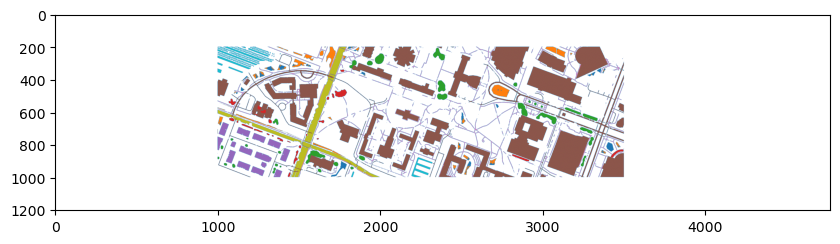

In [6]:
plt.figure(figsize=(10,15))
plt.imshow(viz_label_img(label))
plt.show()

In [7]:
print(hyp.shape)
print(label.shape)

(1202, 4768, 48)
(1202, 4768)


## Préparation des données pour les différents algorithmes

Nouvelle fonction de visualisation de l'image pour le DummyClassifier et le RandomForestClassifier

In [8]:
def viz_label_img(label_img):
    unique_labels = np.unique(label_img)
    N = len(unique_labels)+1
    
    colours = cm.get_cmap("tab10", N)
    cmap = colours(np.linspace(0, 1, N))
    cmap[0,-1] = 0
    display_img = cmap[label_img.flatten()]
    display_img = display_img.reshape((label_img.shape[0], label_img.shape[1], -1))
    return display_img

Mise en forme du label

In [9]:
label = label.reshape(-1)
print(label.shape)

(5731136,)


Récupération des data

In [10]:
X =  hyp.reshape(-1,48)
y = label

print(X.shape)
print(y.shape)

(5731136, 48)
(5731136,)


Separation entre les donnees labelisées et non labelisées

In [11]:
X_labeled = X[label != 0]
y_labeled = y[label != 0]
X_no_labeled = X[label == 0]
y_no_labeled = y[label == 0]

print(X_labeled.shape)
print(y_labeled.shape)
print(X_no_labeled.shape)
print(y_no_labeled.shape)

(757384, 48)
(757384,)
(4973752, 48)
(4973752,)


Préparation des données d'entraînement et de test sur les données labelisées

In [12]:
from sklearn.model_selection import train_test_split
X_train_labeled, X_test_labeled, y_train_labeled, y_test_labeled = train_test_split(X_labeled, y_labeled,test_size=0.1, random_state=42)

print(X_train_labeled.shape)
print(y_train_labeled.shape)
print(X_test_labeled.shape)
print(y_test_labeled.shape)

(681645, 48)
(681645,)
(75739, 48)
(75739,)


Nom des différentes classes qui serviront pour l'affichage des matrices de confusion

In [13]:
classes = ["Herbes saines", 
           "Herbes en état de stress hydrique", 
           "Conifères", 
           "Feuillus", 
           "Bâtiments résidentiels", 
           "Bâtiments non-résidentiels", 
           "Routes", 
           "Trottoirs", 
           "Carrefour", 
           "Grands axes routiers", 
           "Stationnements asphaltés",
           "Voitures"]

## Dummy Classifier

Entrainement du modèle DummyClassifier avec le paramètre most-frequent

In [14]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_labeled, y_train_labeled)
dummy.score(X_test_labeled, y_test_labeled)

0.5474326304809939

Prédiction de l'image labelisée avec le DummyClassifier

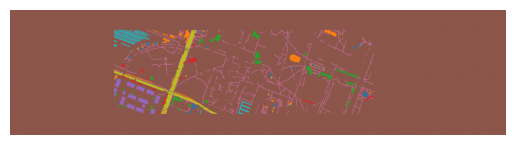

In [15]:
y_pred_dummy = dummy.predict(X_no_labeled)

label_img_dummy = houston["label_img"]


label_img_dummy[label_img_dummy == 0] = y_pred_dummy

display_img_2 = viz_label_img(label_img_dummy)

plt.imshow(display_img_2)
plt.axis('off')
plt.show()

Matrice de confusion du Dummy Classifier

In [16]:
from sklearn.metrics import confusion_matrix
cm_dummy = confusion_matrix(y_test_labeled, dummy.predict(X_test_labeled))
confusion_df = pd.DataFrame(cm_dummy)
confusion_df.columns = classes
confusion_df.index = classes
confusion_df

,Herbes saines,Herbes en état de stress hydrique,Conifères,Feuillus,Bâtiments résidentiels,Bâtiments non-résidentiels,Routes,Trottoirs,Carrefour,Grands axes routiers,Stationnements asphaltés,Voitures
Herbes saines,0,0,0,0,0,1167,0,0,0,0,0,0
Herbes en état de stress hydrique,0,0,0,0,0,2769,0,0,0,0,0,0
Conifères,0,0,0,0,0,3539,0,0,0,0,0,0
Feuillus,0,0,0,0,0,1360,0,0,0,0,0,0
Bâtiments résidentiels,0,0,0,0,0,3398,0,0,0,0,0,0
Bâtiments non-résidentiels,0,0,0,0,0,41462,0,0,0,0,0,0
Routes,0,0,0,0,0,5556,0,0,0,0,0,0
Trottoirs,0,0,0,0,0,8567,0,0,0,0,0,0
Carrefour,0,0,0,0,0,316,0,0,0,0,0,0
Grands axes routiers,0,0,0,0,0,5076,0,0,0,0,0,0


## Random Forest

Création d'un plus petit échantillon pour pouvoir faire la GridSearchCV

In [17]:
import numpy as np

sample_size = int(0.1 * X_train_labeled.shape[0])

random_indices = np.random.choice(X_train_labeled.shape[0], size=sample_size, replace=False)

X_train_small = X_train_labeled[random_indices, :]
y_train_small = y_train_labeled[random_indices]

print(X_train_small.shape)
print(y_train_small.shape)

(68164, 48)
(68164,)


GridSearchCV pour déterminer les meilleurs paramètres (n_estimators et max_depth) du RandomForestClassifier

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 40, 50, 60, 80, 90, 100],
    'max_depth': [30, 40, 50, 60]
}
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=5, n_jobs=2)
grid_search.fit(X_train_small, y_train_small)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [30, 40, 50, 60],
                         'n_estimators': [30, 40, 50, 60, 80, 90, 100]})

Le meilleur score que l'on obtient avec les meilleurs paramètres

In [19]:
grid_search.best_score_

0.8859515983034815

Les meilleurs paramètres qui permettent d'avoir le meilleur score

In [20]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 90}

L'ensemble des résultats de la GridSearchCV

In [21]:
results = grid_search.cv_results_
results = pd.DataFrame(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.989842,0.055055,0.117511,0.004433,30,30,"{'max_depth': 30, 'n_estimators': 30}",0.879410,0.882711,0.875963,0.882858,0.883729,0.880934,0.002888,27
1,5.348672,0.274475,0.149616,0.006496,30,40,"{'max_depth': 30, 'n_estimators': 40}",0.878970,0.883518,0.877723,0.882418,0.887031,0.881932,0.003324,24
2,6.297312,0.013026,0.182830,0.004376,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.881024,0.885352,0.880511,0.883591,0.886664,0.883428,0.002387,19
3,7.697839,0.157274,0.216644,0.002548,30,60,"{'max_depth': 30, 'n_estimators': 60}",0.881464,0.885425,0.881024,0.885205,0.887617,0.884147,0.002520,14
4,10.173227,0.303137,0.294861,0.013563,30,80,"{'max_depth': 30, 'n_estimators': 80}",0.883371,0.885718,0.882344,0.886892,0.887544,0.885174,0.002006,9
5,11.729957,0.224830,0.336274,0.016760,30,90,"{'max_depth': 30, 'n_estimators': 90}",0.883151,0.887112,0.881537,0.887259,0.890698,0.885952,0.003253,1
6,12.539979,0.065045,0.357369,0.004579,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.884031,0.885718,0.881171,0.887919,0.889231,0.885614,0.002852,4
7,3.765988,0.016516,0.113419,0.003057,40,30,"{'max_depth': 40, 'n_estimators': 30}",0.878970,0.884618,0.878310,0.883445,0.883583,0.881785,0.002608,25
8,4.972771,0.033408,0.147056,0.004201,40,40,"{'max_depth': 40, 'n_estimators': 40}",0.881464,0.883885,0.880877,0.883591,0.886664,0.883296,0.002048,21
9,6.382290,0.189477,0.180338,0.002427,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.879924,0.885572,0.878530,0.887259,0.887251,0.883707,0.003735,17


Moyenne des scores obtenus de la cross validation

In [22]:
mean_val_scores = results['mean_test_score']
scores_matrix = np.array(mean_val_scores).reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))

Affichage des 2 courbes montrant l'évolution du score en fonction des paramètres 

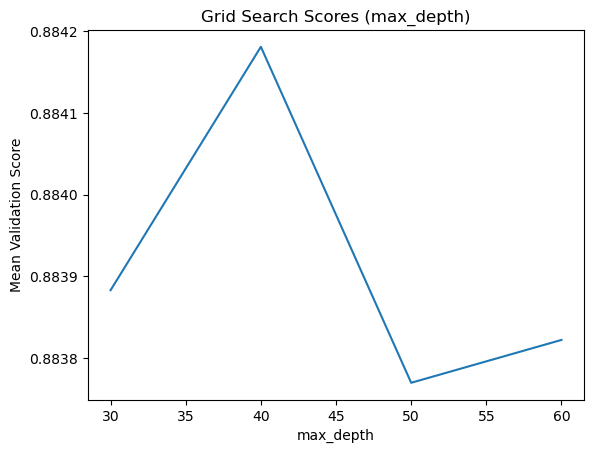

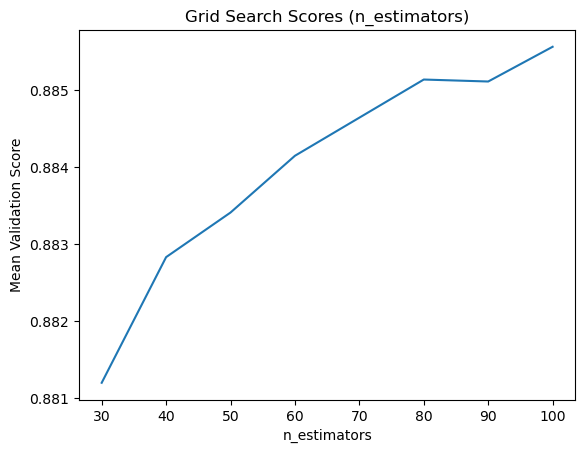

In [23]:
plt.figure()
plt.plot(param_grid['max_depth'], scores_matrix.mean(axis=1))
plt.xlabel('max_depth')
plt.ylabel('Mean Validation Score')
plt.title('Grid Search Scores (max_depth)')

plt.figure()
plt.plot(param_grid['n_estimators'], scores_matrix.mean(axis=0))
plt.xlabel('n_estimators')
plt.ylabel('Mean Validation Score')
plt.title('Grid Search Scores (n_estimators)')

plt.show()

Entrainement du modèle RandomForestClassifier avec les meilleurs paramètres de la GridSearchCV

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=80, max_depth=50)
rf.fit(X_train_labeled, y_train_labeled)
rf.score(X_test_labeled, y_test_labeled)

0.990163588111805

[ 54531 109063 163594 218126 272658 327189 381721 436252 490784 545316]


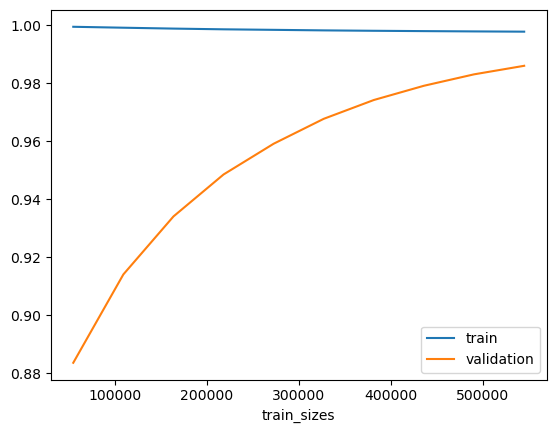

In [31]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(rf, X_train_labeled, y_train_labeled, train_sizes= np.linspace(0.1,1,10),cv=5, n_jobs=2)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Prédiction de l'image labelisée avec le RandomForestClassifier

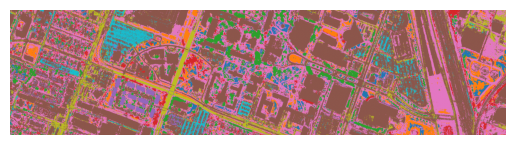

In [25]:
label_img_rf = houston["label_img"]

y_pred_rf = rf.predict(X_no_labeled)

label_img_rf[label_img_rf == 0] = y_pred_rf

display_img = viz_label_img(label_img_rf)

plt.imshow(display_img)
plt.axis('off')
plt.show()

Enregristrement de l'image 

In [26]:
np.save('ADAM_JOSSE_random_forest_labellise.npy', display_img)

Matrice de confusion de la RandomForestClassifier

In [27]:
cm_rf = confusion_matrix(y_test_labeled, rf.predict(X_test_labeled))
confusion_df = pd.DataFrame(cm_rf)
confusion_df.columns = classes
confusion_df.index = classes
confusion_df

,Herbes saines,Herbes en état de stress hydrique,Conifères,Feuillus,Bâtiments résidentiels,Bâtiments non-résidentiels,Routes,Trottoirs,Carrefour,Grands axes routiers,Stationnements asphaltés,Voitures
Herbes saines,1167,0,0,0,0,0,0,0,0,0,0,0
Herbes en état de stress hydrique,0,2769,0,0,0,0,0,0,0,0,0,0
Conifères,0,1,3526,0,1,8,0,3,0,0,0,0
Feuillus,0,0,1,1345,0,10,0,4,0,0,0,0
Bâtiments résidentiels,0,0,5,3,3373,3,5,9,0,0,0,0
Bâtiments non-résidentiels,0,0,10,8,3,41372,2,67,0,0,0,0
Routes,0,2,0,0,7,11,5422,48,7,58,1,0
Trottoirs,4,25,19,16,3,82,60,8299,5,54,0,0
Carrefour,0,0,0,0,0,0,8,3,280,25,0,0
Grands axes routiers,0,2,0,0,0,0,15,46,21,4992,0,0


Score f1 du RandomForestClassifier

In [28]:
import pandas as pd
from sklearn.metrics import f1_score

y_pred = rf.predict(X_test_labeled)
f1_scores = f1_score(y_test_labeled, y_pred, average=None)

df_scores = pd.DataFrame({'Classe': classes, 'F1 Score': f1_scores})

df_scores

,Classe,F1 Score
0,Herbes saines,0.998289
1,Herbes en état de stress hydrique,0.994612
2,Conifères,0.993239
3,Feuillus,0.984627
4,Bâtiments résidentiels,0.993374
5,Bâtiments non-résidentiels,0.996772
6,Routes,0.979673
7,Trottoirs,0.973604
8,Carrefour,0.890302
9,Grands axes routiers,0.978248


## kNN 1

Le travail sur le KNN a été réalisé au départ. Nous n'avions pas pris en compte l'image hyperspectrale mais uniquement le label ce qui nous a poussé à repenser notre travail. Mais on souhaitait tout de même présenter l'ensemble de notre travail.

In [25]:
def viz_label_img(label_img):
    N = np.max(label_img) + 1  
    colours = cm.get_cmap("tab10", N)
    cmap = colours(np.linspace(0, 1, N))  # obtenir une image RGB
    cmap[0, -1] = 0  # transparent pour les pixels à étiquetter
    display_img = cmap[label_img.flatten()]
    display_img = display_img.reshape((label_img.shape[0], label_img.shape[1], -1))
    return display_img

Préparation des données à partir du label

In [26]:
label = houston["label_img"]

X = label.reshape(-1)
y = label[label != 0]
  
X_train = np.column_stack(np.where(label != 0))

label_reshape = label.reshape(-1)
y_train = X[label_reshape != 0]
X_test = np.column_stack(np.where(label == 0))


Entrainement du KNeighborsClassifier à partir du label

C:\Users\samue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


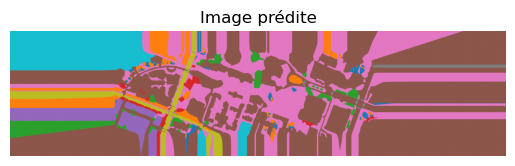

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


pred_img = np.zeros_like(label)

pred_img[label != 0] = label[label != 0]

pred_img[X_test[:,0], X_test[:,1]] = y_pred

plt.imshow(viz_label_img(pred_img))
plt.axis('off')
plt.title('Image prédite')
plt.show()